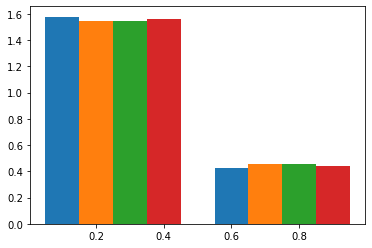

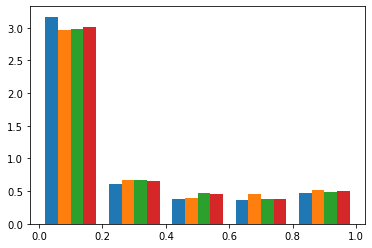

In [81]:
# import dirichlet
import numpy as np
import matplotlib.pyplot as plt

# Using dirichlet() method
gfg = np.random.dirichlet((0.25, 0.25, 0.25, 0.25), size = 1000)

count, bins, ignored = plt.hist(gfg, 2, density = True)
plt.show()

count, bins, ignored = plt.hist(gfg, 5, density = True)
plt.show()

In [82]:
print(len(gfg))
print(gfg.shape)
print(np.sum(gfg, axis=1)[:10])
print(len(np.sum(gfg, axis=1)))
gfg[:10]

1000
(1000, 4)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1000


array([[7.01437863e-02, 1.40457968e-01, 6.67709600e-01, 1.21688646e-01],
       [1.02030721e-01, 8.89853639e-01, 7.63090471e-03, 4.84735338e-04],
       [3.15792993e-01, 4.69335659e-13, 2.54846996e-01, 4.29360012e-01],
       [2.59428124e-01, 1.28081173e-02, 2.56870330e-02, 7.02076725e-01],
       [7.91830581e-04, 3.34482503e-01, 1.00243332e-01, 5.64482334e-01],
       [6.61566978e-06, 8.35628216e-04, 1.56090242e-01, 8.43067514e-01],
       [7.49873576e-08, 4.46617067e-01, 9.03240767e-13, 5.53382858e-01],
       [2.91720602e-01, 3.00946134e-02, 8.23243271e-04, 6.77361541e-01],
       [7.55502834e-02, 3.00102257e-01, 8.22571509e-02, 5.42090308e-01],
       [9.42407229e-01, 2.70370598e-03, 3.81153810e-02, 1.67736844e-02]])

(0.5, 0.5, 0.5, 0.5) 10000 10000.0


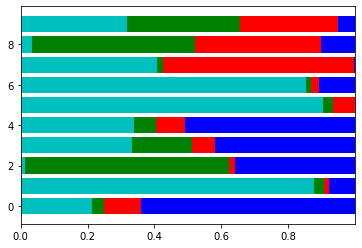

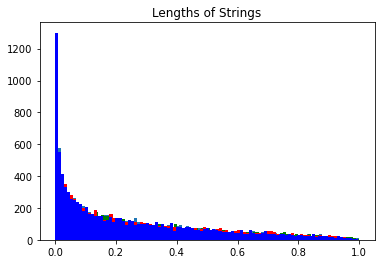

In [83]:
def test_dirichlet(alpha=(0.5, 0.5, 0.5, 0.5), size=10000):
    s = np.random.dirichlet(alpha, size)
    print(alpha, len(s), sum(np.sum(s, axis=1)))
    plt.barh(range(10), s[:10, 0], color='c')
    plt.barh(range(10), s[:10, 1], left=s[:10,0], color='g')
    plt.barh(range(10), s[:10, 2], left=s[:10,0]+s[:10,1], color='r')
    plt.barh(range(10), s[:10, 3], left=s[:10,0]+s[:10,1]+s[:10,2], color='b')
    plt.show()
    plt.title("Lengths of Strings")
    r=plt.hist(s[:, 0], bins=100)
    r=plt.hist(s[:, 1], bins=100, color='g')
    r=plt.hist(s[:, 2], bins=100, color='r')
    r=plt.hist(s[:, 3], bins=100, color='b')
    plt.show()
    
test_dirichlet()

[5, 5, 5, 5] 10000 10000.0


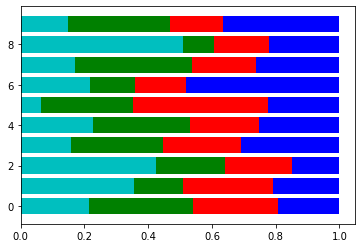

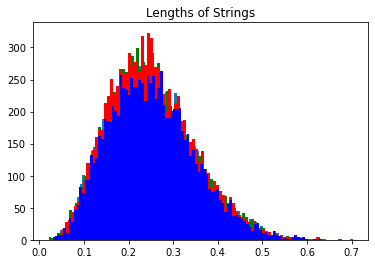

[1, 1, 1, 1] 10000 10000.0


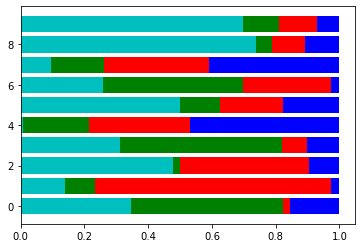

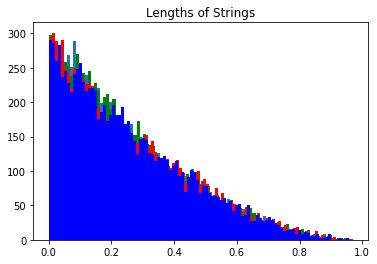

[0.5, 0.5, 0.5, 0.5] 10000 10000.0


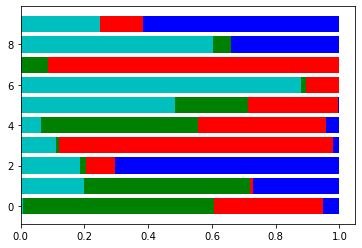

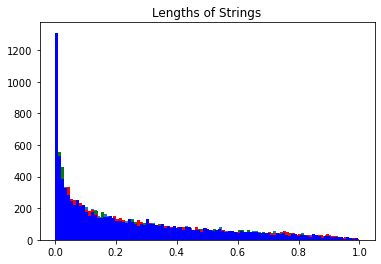

[0.1, 0.1, 0.1, 0.1] 10000 10000.0


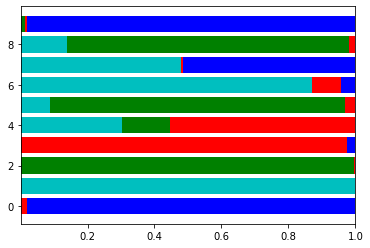

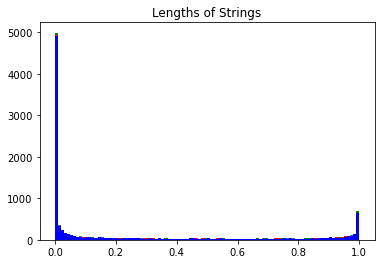

In [84]:
test_dirichlet([5]*4)
test_dirichlet([1]*4)
test_dirichlet([0.5]*4)
test_dirichlet([0.1]*4)

In [85]:
def dirichlet_distribution_noniid_slice(label, client_num, alpha, min_size=1, prior=None):
    r"""Get sample index list for each client from the Dirichlet distribution.
    https://github.com/FedML-AI/FedML/blob/master/fedml_core/non_iid
    partition/noniid_partition.py

    Arguments:
        label (np.array): Label list to be split.
        client_num (int): Split label into client_num parts.
        alpha (float): alpha of LDA.
        min_size (int): min number of sample in each client
    Returns:
        idx_slice (List): List of splited label index slice.
    """
    # if len(label.shape) != 1:
    #     raise ValueError('Only support single-label tasks!')

    # if prior is not None:
    #     return _split_according_to_prior(label, client_num, prior)

    num = len(label)
    classes = len(np.unique(label))
    assert num > client_num * min_size, f'The number of sample should be ' \
                                        f'greater than' \
                                        f' {client_num * min_size}.'
    size = 0
    while size < min_size: # 모두 min_size보다 많이 할당될 때까지 분배 시도
        idx_slice = [[] for _ in range(client_num)]
        for k in range(classes):
            # for label k
            idx_k = np.where(label == k)[0]
            np.random.shuffle(idx_k)
            prop = np.random.dirichlet(np.repeat(alpha, client_num))
            # prop = np.array([
            #    p * (len(idx_j) < num / client_num)
            #    for p, idx_j in zip(prop, idx_slice)
            # ])
            # prop = prop / sum(prop)
            prop = (np.cumsum(prop) * len(idx_k)).astype(int)[:-1]
            idx_slice = [
                idx_j + idx.tolist()
                for idx_j, idx in zip(idx_slice, np.split(idx_k, prop))
            ]
            size = min([len(idx_j) for idx_j in idx_slice])
    for i in range(client_num):
        np.random.shuffle(idx_slice[i])
    return idx_slice

In [86]:
np.where(label == 1)

(array([   1,   11,   21,   31,   41,   51,   61,   71,   81,   91,  101,
         111,  121,  131,  141,  151,  161,  171,  181,  191,  201,  211,
         221,  231,  241,  251,  261,  271,  281,  291,  301,  311,  321,
         331,  341,  351,  361,  371,  381,  391,  401,  411,  421,  431,
         441,  451,  461,  471,  481,  491,  501,  511,  521,  531,  541,
         551,  561,  571,  581,  591,  601,  611,  621,  631,  641,  651,
         661,  671,  681,  691,  701,  711,  721,  731,  741,  751,  761,
         771,  781,  791,  801,  811,  821,  831,  841,  851,  861,  871,
         881,  891,  901,  911,  921,  931,  941,  951,  961,  971,  981,
         991, 1001, 1011, 1021, 1031, 1041, 1051, 1061, 1071, 1081, 1091,
        1101, 1111, 1121, 1131, 1141, 1151, 1161, 1171, 1181, 1191, 1201,
        1211, 1221, 1231, 1241, 1251, 1261, 1271, 1281, 1291, 1301, 1311,
        1321, 1331, 1341, 1351, 1361, 1371, 1381, 1391, 1401, 1411, 1421,
        1431, 1441, 1451, 1461, 1471, 

In [87]:
x = np.arange(8.0)
np.split(x, [3, 5, 6, 10])

[array([0., 1., 2.]),
 array([3., 4.]),
 array([5.]),
 array([6., 7.]),
 array([], dtype=float64)]

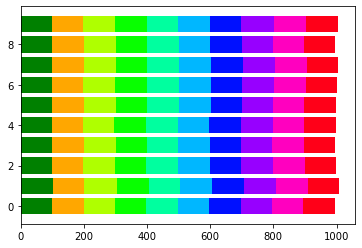

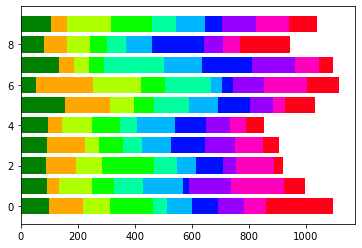

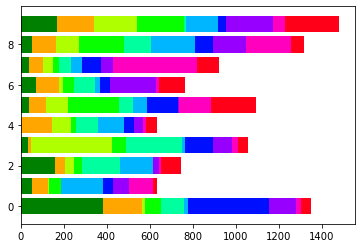

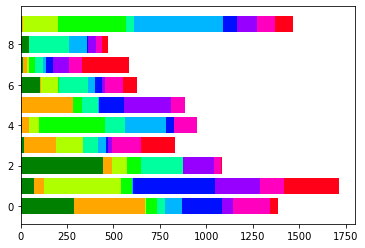

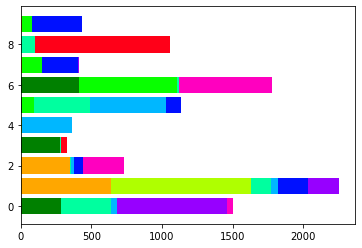

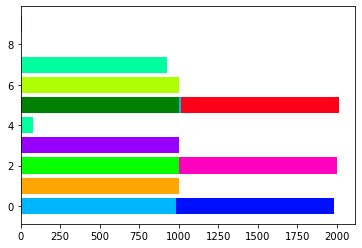

In [88]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def test_dirichlet_distribution_noniid_slice(label, client_num, alpha, min_size=1, prior=None):
    classes = len(np.unique(label))
    size = 0
    while size < min_size: # 모두 min_size보다 많이 할당될 때까지 분배 시도
        idx_slice = [[] for _ in range(client_num)]
        for k in range(classes):
            # for label k
            # print(f"k: {k}")
            idx_k = np.where(label == k)[0]
            # print(f"idx_k: {idx_k}")
            np.random.shuffle(idx_k)
            prop = np.random.dirichlet(np.repeat(alpha, client_num))
            # print(f"prop: {prop}")
            # prop = np.array([
            #    p * (len(idx_j) < num / client_num)
            #    for p, idx_j in zip(prop, idx_slice)
            # ])
            # prop = prop / sum(prop)
            # print(f"list: {(np.cumsum(prop) * len(idx_k)).astype(int)}")
            prop = (np.cumsum(prop) * len(idx_k)).astype(int)[:-1]
            # print(f"prop: {prop}")
            idx_slice = [
                idx_j + [k]*len(idx)
                for idx_j, idx in zip(idx_slice, np.split(idx_k, prop))
            ]
            # print(f"idx_slice: {idx_slice}")
            size = min([len(idx_j) for idx_j in idx_slice])
            # print(f"size: {size}")
            # print()
    import torch
    
    s=torch.stack([torch.bincount(torch.tensor(idx_j), minlength=classes) for idx_j in idx_slice])
    ss=torch.cumsum(s, 1)
    cmap = get_cmap(classes)
    plt.barh(range(10), s[:10, 0], color='g')
    for c in range(1, classes):
        plt.barh(range(10), s[:10, c], left=ss[:10, c-1],color=cmap(c))
    plt.show()
    
    # plt.title("Lengths of Strings")
    # r=plt.hist(s[:, 0], bins=100)
    # r=plt.hist(s[:, 1], bins=100, color='g')
    # r=plt.hist(s[:, 2], bins=100, color='r')
    # r=plt.hist(s[:, 3], bins=100, color='b')
    # plt.show()
    return idx_slice

client_num=10
label=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*1000)
alpha=10000
idx_slice=test_dirichlet_distribution_noniid_slice(label, client_num, alpha)
alpha=5
idx_slice=test_dirichlet_distribution_noniid_slice(label, client_num, alpha)
alpha=1
idx_slice=test_dirichlet_distribution_noniid_slice(label, client_num, alpha)
alpha=0.5
idx_slice=test_dirichlet_distribution_noniid_slice(label, client_num, alpha)
alpha=0.1
idx_slice=test_dirichlet_distribution_noniid_slice(label, client_num, alpha)

alpha=0.01
idx_slice=test_dirichlet_distribution_noniid_slice(label, client_num, alpha)